In [1]:
import xarray as xr
import numpy as np
from dask.distributed import Client
from carbon_math import carbon_flux
import xesmf as xe
client = Client()

In [2]:
client

<Client: 'tcp://127.0.0.1:41273' processes=3 threads=6, memory=38.65 GB>

In [2]:
#Load our files in
BGC_monthly = xr.open_zarr('/OSM/CBR/OA_DCFP/data/model_output/CAFE/data_assimilation/d60-zarr/ocean_bgc_month.zarr/',consolidated=True)
ocean_monthly = xr.open_zarr('/OSM/CBR/OA_DCFP/data/model_output/CAFE/data_assimilation/d60-zarr/ocean_month.zarr/',consolidated=True)
atom_monthly= xr.open_zarr('/OSM/CBR/OA_DCFP/data/model_output/CAFE/data_assimilation/d60-zarr/atmos_isobaric_month.zarr/',consolidated=True)

In [4]:
BGC_monthly

<xarray.Dataset>
Dimensions:          (ensemble: 96, scalar_axis: 1, st_ocean: 50, time: 720, xt_ocean: 360, yt_ocean: 300)
Coordinates:
  * ensemble         (ensemble) int32 1 2 3 4 5 6 7 8 ... 90 91 92 93 94 95 96
  * scalar_axis      (scalar_axis) float64 0.0
  * st_ocean         (st_ocean) float64 5.0 15.0 25.0 ... 5.499e+03 5.831e+03
  * time             (time) object 1960-01-16 12:00:00 ... 2019-12-16 12:00:00
  * xt_ocean         (xt_ocean) float64 -279.5 -278.5 -277.5 ... 77.5 78.5 79.5
  * yt_ocean         (yt_ocean) float64 -77.88 -77.63 -77.38 ... 89.32 89.77
Data variables:
    adic             (time, ensemble, st_ocean, yt_ocean, xt_ocean) float32 dask.array<chunksize=(1, 96, 3, 300, 360), meta=np.ndarray>
    alk              (time, ensemble, st_ocean, yt_ocean, xt_ocean) float32 dask.array<chunksize=(1, 96, 3, 300, 360), meta=np.ndarray>
    caco3            (time, ensemble, st_ocean, yt_ocean, xt_ocean) float32 dask.array<chunksize=(1, 96, 3, 300, 360), meta=np.ndarray>
    caco3_sediment   (time, ensemble, yt_ocean, xt_ocean) float32 dask.array<chunksize=(1, 96, 300, 360), meta=np.ndarray>
    det              (time, ensemble, st_ocean, yt_ocean, xt_ocean) float32 dask.array<chunksize=(1, 96, 3, 300, 360), meta=np.ndarray>
    det_sediment     (time, ensemble, yt_ocean, xt_ocean) float32 dask.array<chunksize=(1, 96, 300, 360), meta=np.ndarray>
    dic              (time, ensemble, st_ocean, yt_ocean, xt_ocean) float32 dask.array<chunksize=(1, 96, 3, 300, 360), meta=np.ndarray>
    export_inorg     (time, ensemble, yt_ocean, xt_ocean) float32 dask.array<chunksize=(1, 96, 300, 360), meta=np.ndarray>
    export_prod      (time, ensemble, yt_ocean, xt_ocean) float32 dask.array<chunksize=(1, 96, 300, 360), meta=np.ndarray>
    fe               (time, ensemble, st_ocean, yt_ocean, xt_ocean) float32 dask.array<chunksize=(1, 96, 3, 300, 360), meta=np.ndarray>
    no3              (time, ensemble, st_ocean, yt_ocean, xt_ocean) float32 dask.array<chunksize=(1, 96, 3, 300, 360), meta=np.ndarray>
    o2               (time, ensemble, st_ocean, yt_ocean, xt_ocean) float32 dask.array<chunksize=(1, 96, 3, 300, 360), meta=np.ndarray>
    paco2            (time, ensemble, yt_ocean, xt_ocean) float32 dask.array<chunksize=(1, 96, 300, 360), meta=np.ndarray>
    pco2             (time, ensemble, yt_ocean, xt_ocean) float32 dask.array<chunksize=(1, 96, 300, 360), meta=np.ndarray>
    phy              (time, ensemble, st_ocean, yt_ocean, xt_ocean) float32 dask.array<chunksize=(1, 96, 3, 300, 360), meta=np.ndarray>
    pprod_gross      (time, ensemble, st_ocean, yt_ocean, xt_ocean) float32 dask.array<chunksize=(1, 96, 3, 300, 360), meta=np.ndarray>
    pprod_gross_2d   (time, ensemble, yt_ocean, xt_ocean) float32 dask.array<chunksize=(1, 96, 300, 360), meta=np.ndarray>
    stf03            (time, ensemble, yt_ocean, xt_ocean) float32 dask.array<chunksize=(1, 96, 300, 360), meta=np.ndarray>
    stf07            (time, ensemble, yt_ocean, xt_ocean) float32 dask.array<chunksize=(1, 96, 300, 360), meta=np.ndarray>
    stf10            (time, ensemble, yt_ocean, xt_ocean) float32 dask.array<chunksize=(1, 96, 300, 360), meta=np.ndarray>
    surface_adic     (time, ensemble, yt_ocean, xt_ocean) float32 dask.array<chunksize=(1, 96, 300, 360), meta=np.ndarray>
    surface_alk      (time, ensemble, yt_ocean, xt_ocean) float32 dask.array<chunksize=(1, 96, 300, 360), meta=np.ndarray>
    surface_caco3    (time, ensemble, yt_ocean, xt_ocean) float32 dask.array<chunksize=(1, 96, 300, 360), meta=np.ndarray>
    surface_det      (time, ensemble, yt_ocean, xt_ocean) float32 dask.array<chunksize=(1, 96, 300, 360), meta=np.ndarray>
    surface_dic      (time, ensemble, yt_ocean, xt_ocean) float32 dask.array<chunksize=(1, 96, 300, 360), meta=np.ndarray>
    surface_fe       (time, ensemble, yt_ocean, xt_ocean) float32 dask.array<chunksize=(1, 96, 300, 360), meta=np.ndarray>
    surface_no3      (time, ensemble, yt_ocean, xt_ocean) float32 dask.array<ch

In [6]:
BGC_monthly.stf10.nbytes/1e9

29.85984

In [55]:
BGC_monthly.export_prod

<xarray.DataArray 'export_prod' (time: 720, ensemble: 96, yt_ocean: 300, xt_ocean: 360)>
dask.array<zarr, shape=(720, 96, 300, 360), dtype=float32, chunksize=(1, 96, 300, 360), chunktype=numpy.ndarray>
Coordinates:
  * ensemble  (ensemble) int32 1 2 3 4 5 6 7 8 9 ... 88 89 90 91 92 93 94 95 96
  * time      (time) object 1960-01-16 12:00:00 ... 2019-12-16 12:00:00
  * xt_ocean  (xt_ocean) float64 -279.5 -278.5 -277.5 -276.5 ... 77.5 78.5 79.5
  * yt_ocean  (yt_ocean) float64 -77.88 -77.63 -77.38 ... 88.87 89.32 89.77
Attributes:
    cell_methods:  time: mean
    coordinates:   geolon_t geolat_t
    long_name:     Organic export through 100m
    units:         mmolN/m^2/s

In [9]:
BGC_monthly.total_co2_flux

<xarray.DataArray 'total_co2_flux' (time: 720, ensemble: 96, scalar_axis: 1)>
dask.array<zarr, shape=(720, 96, 1), dtype=float32, chunksize=(1, 96, 1), chunktype=numpy.ndarray>
Coordinates:
  * ensemble     (ensemble) int32 1 2 3 4 5 6 7 8 9 ... 89 90 91 92 93 94 95 96
  * scalar_axis  (scalar_axis) float64 0.0
  * time         (time) object 1960-01-16 12:00:00 ... 2019-12-16 12:00:00
Attributes:
    cell_methods:  time: mean
    long_name:     Total surface flux of inorganic C (natural) into ocean
    units:         Pg/yr

In [10]:
BGC_monthly.pprod_gross_2d

<xarray.DataArray 'pprod_gross_2d' (time: 720, ensemble: 96, yt_ocean: 300, xt_ocean: 360)>
dask.array<zarr, shape=(720, 96, 300, 360), dtype=float32, chunksize=(1, 96, 300, 360), chunktype=numpy.ndarray>
Coordinates:
  * ensemble  (ensemble) int32 1 2 3 4 5 6 7 8 9 ... 88 89 90 91 92 93 94 95 96
  * time      (time) object 1960-01-16 12:00:00 ... 2019-12-16 12:00:00
  * xt_ocean  (xt_ocean) float64 -279.5 -278.5 -277.5 -276.5 ... 77.5 78.5 79.5
  * yt_ocean  (yt_ocean) float64 -77.88 -77.63 -77.38 ... 88.87 89.32 89.77
Attributes:
    cell_methods:  time: mean
    coordinates:   geolon_t geolat_t
    long_name:     Vertically integrated Gross PHY production
    units:         mmolN/m^2/s

In [12]:
#Check ocean variables
ocean_monthly

<xarray.Dataset>
Dimensions:                 (ensemble: 96, st_ocean: 50, sw_ocean: 50, time: 720, xt_ocean: 360, xu_ocean: 360, yt_ocean: 300, yu_ocean: 300)
Coordinates:
  * ensemble                (ensemble) int32 1 2 3 4 5 6 7 ... 91 92 93 94 95 96
  * st_ocean                (st_ocean) float64 5.0 15.0 ... 5.499e+03 5.831e+03
  * sw_ocean                (sw_ocean) float64 10.0 20.0 ... 5.665e+03 6e+03
  * time                    (time) object 1960-01-16 12:00:00 ... 2019-12-16 ...
  * xt_ocean                (xt_ocean) float64 -279.5 -278.5 ... 78.5 79.5
  * xu_ocean                (xu_ocean) float64 -279.0 -278.0 ... 79.0 80.0
  * yt_ocean                (yt_ocean) float64 -77.88 -77.63 ... 89.32 89.77
  * yu_ocean                (yu_ocean) float64 -77.75 -77.51 ... 89.55 90.0
Data variables:
    age_global              (time, ensemble, st_ocean, yt_ocean, xt_ocean) float32 dask.array<chunksize=(1, 96, 3, 300, 360), meta=np.ndarray>
    cfc_11                  (time, ensemble, st_ocean, yt_ocean, xt_ocean) float32 dask.array<chunksize=(1, 96, 3, 300, 360), meta=np.ndarray>
    cfc_12                  (time, ensemble, st_ocean, yt_ocean, xt_ocean) float32 dask.array<chunksize=(1, 96, 3, 300, 360), meta=np.ndarray>
    eta_t                   (time, ensemble, yt_ocean, xt_ocean) float32 dask.array<chunksize=(1, 96, 300, 360), meta=np.ndarray>
    neutral_diffusion_salt  (time, ensemble, st_ocean, yt_ocean, xt_ocean) float32 dask.array<chunksize=(1, 96, 3, 300, 360), meta=np.ndarray>
    neutral_diffusion_temp  (time, ensemble, st_ocean, yt_ocean, xt_ocean) float32 dask.array<chunksize=(1, 96, 3, 300, 360), meta=np.ndarray>
    neutral_gm_salt         (time, ensemble, st_ocean, yt_ocean, xt_ocean) float32 dask.array<chunksize=(1, 96, 3, 300, 360), meta=np.ndarray>
    neutral_gm_temp         (time, ensemble, st_ocean, yt_ocean, xt_ocean) float32 dask.array<chunksize=(1, 96, 3, 300, 360), meta=np.ndarray>
    salt                    (time, ensemble, st_ocean, yt_ocean, xt_ocean) float32 dask.array<chunksize=(1, 96, 3, 300, 360), meta=np.ndarray>
    salt_sponge_tend        (time, ensemble, st_ocean, yt_ocean, xt_ocean) float32 dask.array<chunksize=(1, 96, 3, 300, 360), meta=np.ndarray>
    salt_vdiff_impl         (time, ensemble, st_ocean, yt_ocean, xt_ocean) float32 dask.array<chunksize=(1, 96, 3, 300, 360), meta=np.ndarray>
    sst                     (time, ensemble, yt_ocean, xt_ocean) float32 dask.array<chunksize=(1, 96, 300, 360), meta=np.ndarray>
    temp                    (time, ensemble, st_ocean, yt_ocean, xt_ocean) float32 dask.array<chunksize=(1, 96, 3, 300, 360), meta=np.ndarray>
    temp_sponge_tend        (time, ensemble, st_ocean, yt_ocean, xt_ocean) float32 dask.array<chunksize=(1, 96, 3, 300, 360), meta=np.ndarray>
    temp_vdiff_impl         (time, ensemble, st_ocean, yt_ocean, xt_ocean) float32 dask.array<chunksize=(1, 96, 3, 300, 360), meta=np.ndarray>
    tx_trans                (time, ensemble, st_ocean, yt_ocean, xu_ocean) float32 dask.array<chunksize=(1, 96, 3, 300, 360), meta=np.ndarray>
    tx_trans_gm             (time, ensemble, st_ocean, yt_ocean, xu_ocean) float32 dask.array<chunksize=(1, 96, 3, 300, 360), meta=np.ndarray>
    ty_trans                (time, ensemble, st_ocean, yu_ocean, xt_ocean) float32 dask.array<chunksize=(1, 96, 3, 300, 360), meta=np.ndarray>
    ty_trans_gm             (time, ensemble, st_ocean, yu_ocean, xt_ocean) float32 dask.array<chunksize=(1, 96, 3, 300, 360), meta=np.ndarray>
    u                       (time, ensemble, st_ocean, yu_ocean, xu_ocean) float32 dask.array<chunksize=(1, 96, 3, 300, 360), meta=np.ndarray>
    v                       (time, ensemble, st_ocean, yu_ocean, xu_ocean) float32 dask.array<chunksize=(1, 96, 3, 300, 360), meta=np.ndarray>
    wt                      (time, ensemble, sw_ocean, yt_ocean, xt_ocean) float32 dask.array<chunksize=(1, 96, 3, 300, 360), meta=np.ndarray>
Attributes:
    calendar:                 julian
    cm-enkf_source:  

In [6]:
#Check atmospheric variables, not different lat and lon vs xt and yt ocean. 
atom_monthly

<xarray.Dataset>
Dimensions:         (ensemble: 96, lat: 90, level: 21, lon: 144, time: 720)
Coordinates:
  * ensemble        (ensemble) int32 1 2 3 4 5 6 7 8 ... 89 90 91 92 93 94 95 96
  * lat             (lat) float64 -89.49 -87.98 -85.96 ... 85.96 87.98 89.49
  * level           (level) float32 1.0 5.0 10.0 20.0 ... 850.0 925.0 1000.0
  * lon             (lon) float64 1.25 3.75 6.25 8.75 ... 353.8 356.2 358.8
  * time            (time) object 1960-01-16 12:00:00 ... 2019-12-16 12:00:00
Data variables:
    DELP            (time, ensemble, level, lat, lon) float32 dask.array<chunksize=(1, 96, 21, 90, 144), meta=np.ndarray>
    awp             (time, ensemble, lat, lon) float32 dask.array<chunksize=(1, 96, 90, 144), meta=np.ndarray>
    evap            (time, ensemble, lat, lon) float32 dask.array<chunksize=(1, 96, 90, 144), meta=np.ndarray>
    h500            (time, ensemble, lat, lon) float32 dask.array<chunksize=(1, 96, 90, 144), meta=np.ndarray>
    hght            (time, ensemble, level, lat, lon) float32 dask.array<chunksize=(1, 96, 21, 90, 144), meta=np.ndarray>
    lwdn_sfc        (time, ensemble, lat, lon) float32 dask.array<chunksize=(1, 96, 90, 144), meta=np.ndarray>
    lwflx           (time, ensemble, lat, lon) float32 dask.array<chunksize=(1, 96, 90, 144), meta=np.ndarray>
    lwup_sfc        (time, ensemble, lat, lon) float32 dask.array<chunksize=(1, 96, 90, 144), meta=np.ndarray>
    olr             (time, ensemble, lat, lon) float32 dask.array<chunksize=(1, 96, 90, 144), meta=np.ndarray>
    omega           (time, ensemble, level, lat, lon) float32 dask.array<chunksize=(1, 96, 21, 90, 144), meta=np.ndarray>
    precip          (time, ensemble, lat, lon) float32 dask.array<chunksize=(1, 96, 90, 144), meta=np.ndarray>
    ps              (time, ensemble, lat, lon) float32 dask.array<chunksize=(1, 96, 90, 144), meta=np.ndarray>
    q_ref           (time, ensemble, lat, lon) float32 dask.array<chunksize=(1, 96, 90, 144), meta=np.ndarray>
    qo3             (time, ensemble, level, lat, lon) float32 dask.array<chunksize=(1, 96, 21, 90, 144), meta=np.ndarray>
    qo3_col         (time, ensemble, lat, lon) float32 dask.array<chunksize=(1, 96, 90, 144), meta=np.ndarray>
    rh              (time, ensemble, level, lat, lon) float32 dask.array<chunksize=(1, 96, 21, 90, 144), meta=np.ndarray>
    shflx           (time, ensemble, lat, lon) float32 dask.array<chunksize=(1, 96, 90, 144), meta=np.ndarray>
    slp             (time, ensemble, lat, lon) float32 dask.array<chunksize=(1, 96, 90, 144), meta=np.ndarray>
    sphum           (time, ensemble, level, lat, lon) float32 dask.array<chunksize=(1, 96, 21, 90, 144), meta=np.ndarray>
    swdn_sfc        (time, ensemble, lat, lon) float32 dask.array<chunksize=(1, 96, 90, 144), meta=np.ndarray>
    swdn_toa        (time, ensemble, lat, lon) float32 dask.array<chunksize=(1, 96, 90, 144), meta=np.ndarray>
    swup_sfc        (time, ensemble, lat, lon) float32 dask.array<chunksize=(1, 96, 90, 144), meta=np.ndarray>
    swup_toa        (time, ensemble, lat, lon) float32 dask.array<chunksize=(1, 96, 90, 144), meta=np.ndarray>
    t_ref           (time, ensemble, lat, lon) float32 dask.array<chunksize=(1, 96, 90, 144), meta=np.ndarray>
    t_ref_max       (time, ensemble, lat, lon) float32 dask.array<chunksize=(1, 96, 90, 144), meta=np.ndarray>
    t_ref_min       (time, ensemble, lat, lon) float32 dask.array<chunksize=(1, 96, 90, 144), meta=np.ndarray>
    t_surf          (time, ensemble, lat, lon) float32 dask.array<chunksize=(1, 96, 90, 144), meta=np.ndarray>
    tau_x           (time, ensemble, lat, lon) float32 dask.array<chunksize=(1, 96, 90, 144), meta=np.ndarray>
    tau_y           (time, ensemble, lat, lon) float32 dask.array<chunksize=(1, 96, 90, 144), meta=np.ndarray>
    temp            (time, ensemble, level, lat, lon) float32 dask.array<chunksize=(1, 96, 21, 90, 144), meta=np.ndarray>
    tot_cld_amt     (time, ensemble, lat, lon) float32 dask.array<chunksize=(1, 96

In [4]:
atm_pco2=BGC_monthly.paco2
sw_pco2=BGC_monthly.pco2
delta_pco2=(atm_pco2-sw_pco2)

In [6]:
#Calc windspeed 
wu=atom_monthly.u_ref
wv=atom_monthly.v_ref
ws=np.sqrt((wu**2)+(wv**2))
ws['lon']=ws['lon']-280

#ws=ws.rename({'lat':'yt_ocean','lon':'xt_ocean'})
#ws['xt_ocean']=ws['xt_ocean']-280

In [7]:
sst=ocean_monthly.sst
salt=ocean_monthly.salt.sel(st_ocean=5)
sst_regridder=sst.rename({'yt_ocean':'lat','xt_ocean':'lon'})

In [8]:
#regrid Windspeed to match
regridder = xe.Regridder(ws, sst_regridder, 'bilinear',reuse_weights=True)
ws_regrid=regridder(ws)
ws_regrid=ws_regrid.rename({'lat':'yt_ocean','lon':'xt_ocean'})


Reuse existing file: bilinear_90x144_300x360.nc


/datastore/pit071/miniconda3/envs/pangeo/lib/python3.8/site-packages/xesmf/frontend.py:412: FutureWarning: ``output_sizes`` should be given in the ``dask_gufunc_kwargs`` parameter. It will be removed as direct parameter in a future version.
  dr_out = xr.apply_ufunc(


In [ ]:
ws_regrid.sel(ensemble=1).compute()

In [9]:
ws_regrid.nbytes/1e9

59.71968

In [ ]:
co2,co2a=carbon_flux(salt,sst,ws_regrid,sw_pco2,atm_pco2)

In [ ]:
delta_pco2.mean(dim=['ensemble','time']).plot()

In [ ]:
BGC_monthly

In [38]:
#Starts again properly here

<xarray.DataArray 'pprod_gross_2d' (time: 720, ensemble: 96, yt_ocean: 300, xt_ocean: 360)>
dask.array<zarr, shape=(720, 96, 300, 360), dtype=float32, chunksize=(1, 96, 300, 360), chunktype=numpy.ndarray>
Coordinates:
  * ensemble  (ensemble) int32 1 2 3 4 5 6 7 8 9 ... 88 89 90 91 92 93 94 95 96
  * time      (time) object 1960-01-16 12:00:00 ... 2019-12-16 12:00:00
  * xt_ocean  (xt_ocean) float64 -279.5 -278.5 -277.5 -276.5 ... 77.5 78.5 79.5
  * yt_ocean  (yt_ocean) float64 -77.88 -77.63 -77.38 ... 88.87 89.32 89.77
Attributes:
    cell_methods:  time: mean
    coordinates:   geolon_t geolat_t
    long_name:     Vertically integrated Gross PHY production
    units:         mmolN/m^2/s

In [5]:
BGC_monthly.pprod_gross_2d
BGC_monthly.pprod_gross
BGC_monthly.phy
BGC_monthly.surface_phy
export=BGC_monthly.export_prod

In [14]:
BGC_monthly.phy

<xarray.DataArray 'phy' (time: 720, ensemble: 96, st_ocean: 50, yt_ocean: 300, xt_ocean: 360)>
dask.array<zarr, shape=(720, 96, 50, 300, 360), dtype=float32, chunksize=(1, 96, 3, 300, 360), chunktype=numpy.ndarray>
Coordinates:
  * ensemble  (ensemble) int32 1 2 3 4 5 6 7 8 9 ... 88 89 90 91 92 93 94 95 96
  * st_ocean  (st_ocean) float64 5.0 15.0 25.0 ... 5.166e+03 5.499e+03 5.831e+03
  * time      (time) object 1960-01-16 12:00:00 ... 2019-12-16 12:00:00
  * xt_ocean  (xt_ocean) float64 -279.5 -278.5 -277.5 -276.5 ... 77.5 78.5 79.5
  * yt_ocean  (yt_ocean) float64 -77.88 -77.63 -77.38 ... 88.87 89.32 89.77
Attributes:
    cell_methods:  time: mean
    coordinates:   geolon_t geolat_t
    long_name:     phy
    units:         mmol/m^3
    valid_range:   [-1000000.0, 1000000.0]

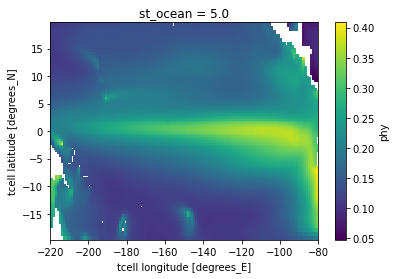

In [19]:
chl=BGC_monthly.phy.sel(st_ocean=5).mean(dim='time')
chl=chl.sel(xt_ocean=slice(-220,-80),yt_ocean=slice(-20,20))
chl=chl*893.51/1000
chl=chl.mean(dim=['ensemble'])
#or chl.sel(ensemble=5)
chl.plot()
#CHLOROPHYLL

In [21]:
BGC_monthly.phy.sel(st_ocean=5).nbytes/1e9

29.85984

In [34]:
#export*6.625*12*86400)/1000)

In [34]:
export=BGC_monthly.export_prod
export_flux=((export*6.625*12*86400)/1000) #So *6.625 to work out carbon moles, * 12 to grams and units are seconds so calculate to a day and 1000 for mmol to mol. #xr.apply_ufunc(moles_to_carbon,, dask='parallelized')

In [7]:
export_flux

<xarray.DataArray 'export_prod' (time: 720, ensemble: 96, yt_ocean: 300, xt_ocean: 360)>
dask.array<transpose, shape=(720, 96, 300, 360), dtype=float32, chunksize=(1, 96, 300, 360), chunktype=numpy.ndarray>
Coordinates:
  * ensemble  (ensemble) int32 1 2 3 4 5 6 7 8 9 ... 88 89 90 91 92 93 94 95 96
  * time      (time) object 1960-01-16 12:00:00 ... 2019-12-16 12:00:00
  * xt_ocean  (xt_ocean) float64 -279.5 -278.5 -277.5 -276.5 ... 77.5 78.5 79.5
  * yt_ocean  (yt_ocean) float64 -77.88 -77.63 -77.38 ... 88.87 89.32 89.77

In [35]:
ef=export_flux.sel(xt_ocean=slice(-220,-80),yt_ocean=slice(-20,20)).mean(dim=['time','ensemble']) #or .sel(ensemble=1...96)

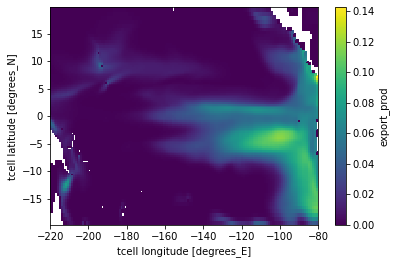

In [36]:
ef.plot()
#New Production here is around 0.3g/m2/day

In [25]:
cafe=xr.open_dataset('/scratch1/pit071/carbon_data_ch2/carbon/avg_npp_rg_cafe.nc')
fratios=xr.open_dataset('/scratch1/pit071/carbon_data_ch2/carbon/fratios.nc')
new_production=(cafe*fratios.laws2011a).avg_npp

In [23]:
new_production

<xarray.Dataset>
Dimensions:  (lat: 40, lat_b: 241, lon: 170, lon_b: 1020, time: 271)
Coordinates:
  * time     (time) datetime64[ns] 1997-09-01 1997-10-01 ... 2020-03-01
  * lat      (lat) float32 -19.5 -18.5 -17.5 -16.5 -15.5 ... 16.5 17.5 18.5 19.5
  * lat_b    (lat_b) float64 -20.02 -19.85 -19.68 -19.52 ... 19.68 19.85 20.02
  * lon      (lon) float32 120.5 121.5 122.5 123.5 ... 286.5 287.5 288.5 289.5
  * lon_b    (lon_b) float64 120.1 120.2 120.4 120.6 ... 289.5 289.6 289.8 290.0
Data variables:
    avg_npp  (time, lat, lon) float64 nan nan nan nan nan ... nan nan nan nan

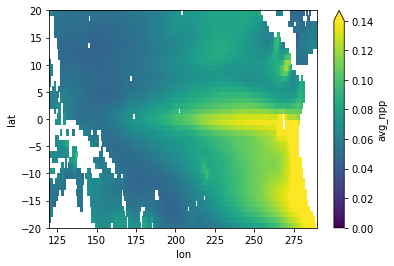

In [35]:
(new_production.mean(dim='time')/1000).plot(vmin=0,vmax=0.14) #(mgG/day)

In [28]:
cafe

<xarray.Dataset>
Dimensions:  (lat: 40, lat_b: 241, lon: 170, lon_b: 1020, time: 273)
Coordinates:
  * lat      (lat) float32 -19.5 -18.5 -17.5 -16.5 -15.5 ... 16.5 17.5 18.5 19.5
  * lat_b    (lat_b) float64 -20.02 -19.85 -19.68 -19.52 ... 19.68 19.85 20.02
  * lon      (lon) float32 120.5 121.5 122.5 123.5 ... 286.5 287.5 288.5 289.5
  * lon_b    (lon_b) float64 120.1 120.2 120.4 120.6 ... 289.5 289.6 289.8 290.0
  * time     (time) datetime64[ns] 1997-09-01 1997-10-01 ... 2020-05-01
Data variables:
    avg_npp  (time, lat, lon) float64 ...

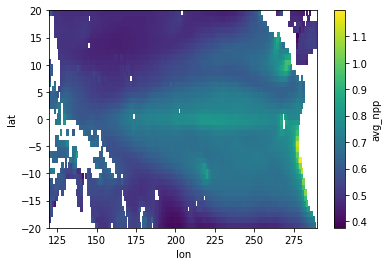

In [48]:
(cafe.mean(dim='time')/1000).avg_npp.plot() #mgC/day

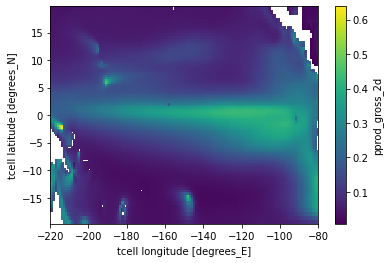

In [30]:
pprod=BGC_monthly.pprod_gross_2d
pprod=((pprod*6.625*12*86400)/1000)
pprod=pprod.sel(xt_ocean=slice(-220,-80),yt_ocean=slice(-20,20)).mean(dim=['time','ensemble'])
pprod.plot()

In [44]:
pprod1=BGC_monthly.pprod_gross

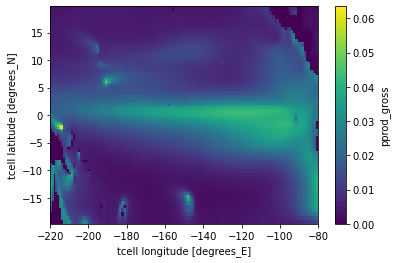

In [47]:
pprod1=pprod1.sel(st_ocean=slice(0,100)).sum(dim='st_ocean')
pprod1=pprod1.sel(xt_ocean=slice(-220,-80),yt_ocean=slice(-20,20)).mean(dim=['time','ensemble'])
pprod1=(pprod1*6.625*12*86400)/1000
pprod1.plot()

In [50]:
pprod1=BGC_monthly.pprod_gross.sel(st_ocean=slice(0,100)).sum(dim='st_ocean')
pprod1

<xarray.DataArray 'pprod_gross' (time: 720, ensemble: 96, yt_ocean: 300, xt_ocean: 360)>
dask.array<sum-aggregate, shape=(720, 96, 300, 360), dtype=float32, chunksize=(1, 96, 300, 360), chunktype=numpy.ndarray>
Coordinates:
  * ensemble  (ensemble) int32 1 2 3 4 5 6 7 8 9 ... 88 89 90 91 92 93 94 95 96
  * time      (time) object 1960-01-16 12:00:00 ... 2019-12-16 12:00:00
  * xt_ocean  (xt_ocean) float64 -279.5 -278.5 -277.5 -276.5 ... 77.5 78.5 79.5
  * yt_ocean  (yt_ocean) float64 -77.88 -77.63 -77.38 ... 88.87 89.32 89.77

In [ ]:
ls /OSM/CBR/OA_DCFP/data/model_output/CAFE/data_assimilation/d60-zarr/

In [ ]:
BGC_daily_ds.pco2.mean(dim=['time','ensemble']).plot()

In [ ]:
pco2=xr.open_mfdataset('/OSM/CBR/OA_DCFP/data/model_output/CAFE/data_assimilation/d60-reshuffle/ocean_bgc/pco2.ocean_bgc.month.CAFE60.*-20*.nc')

In [ ]:
ls /OSM/CBR/OA_DCFP/data/model_output/CAFE/data_assimilation/d60-zarr/

In [ ]:
ls /OSM/CBR/OA_DCFP/data/model_output/CAFE/data_assimilation/d60-zarr/atmos_isobaric_month.zarr/

In [ ]:
from dask.distributed import Client
client = Client() 

In [ ]:
client

In [ ]:
import matplotlib.pyplot as plt
dat=pco2.mean(dim='time').sel(nv=1,xt_ocean=slice(-250,-100),yt_ocean=slice(-30,30)).pco2.load()

In [ ]:
for i in range(96):
    print(i)
    (dat.mean(dim='ensemble')-dat.sel(ensemble=i+1)).plot()
    plt.show()

In [ ]:
remote_data = xr.open_dataset("http://iridl.ldeo.columbia.edu/SOURCES/.OSU/.PRISM/.monthly/dods",
    decode_times=False,
)

In [ ]:


import netCDF4
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

ds = netCDF4.Dataset('http://thredds.socib.es/thredds/dodsC/hf_radar/hf_radar_ibiza-scb_codarssproc001/L1/2016/dep0001_hf-radar-ibiza_scb-codarssproc001_L1_2016-02.nc')

In [ ]:
pwd